<h1>FlowSOM Clustering</h1>

In [1]:
import sys
sys.path.append("/home/ross/CytoPy")

In [2]:
from CytoPy.data.project import Project
from CytoPy.data.setup import global_init
from CytoPy.flow.clustering import flowsom_clustering, Clustering, consensus_metacluster
global_init("cytopy_db")

In [3]:
from sklearn.cluster import AgglomerativeClustering, KMeans
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import pandas as pd
import numpy as np
import logging
sns.set(style="white", font_scale=1.3)
sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})

In [4]:
project = Project.objects(project_id="Peritonitis").get()
project.list_experiments()

['PBMC T cells', 'Corrected PBMC T cells']

In [5]:
exp = project.load_experiment("Corrected PBMC T cells")

In [6]:
features = ['FSC-A', 'FSC-H', 'SSC-A', 'SSC-W', 'CXCR3', 'CD161', 'CCR7', 'Va7-2',
            'CD8', 'Vd2', 'CD45RA', 'PanGD', 'CD4', 'CD27']

<h2>Clustering individual samples</h2>

In [7]:
from warnings import filterwarnings
filterwarnings("ignore")
clustering = Clustering(experiment=exp,
                        features=features,
                        sample_ids=[x for x in exp.list_samples() if x != "Training Data"],
                        root_population="root",
                        transform="logicle",
                        verbose=True,
                        population_prefix="FlowSOM")

Loading single cell data...


  0%|          | 0/14 [00:00<?, ?it/s]

Ready to cluster!


In [8]:
clustering.cluster(flowsom_clustering,
                   meta_cluster_class=AgglomerativeClustering(),
                   meta_cluster_kwargs={"min_n": 12, "max_n": 30},
                   training_kwargs={"som_dim": (50, 50),
                                    "sigma": 1,
                                    "learning_rate": 0.1,
                                    "batch_size": 1000,
                                    "weight_init": "random"},
                   print_performance_metrics=False)

----- Clustering Corrected_165-09 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.15232431011665698

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_175-09 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.13159271171977222

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_210-14 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.11556599521438639

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_251-07 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.14137751494372097

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_254-05 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.12551392921839774

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_255-04 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1622568271023339

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_264-02 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.14566056285129295

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_273-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.14745136860773264

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_286-04 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.1382119457230812

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_294-02 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.10992588376864294

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_305-02 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.14326138755187942

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_306-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.13249532189333882

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_310-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.13592240451965446

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------


----- Clustering Corrected_318-01 -----
------------- Training SOM -------------
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 0.13442302533784936

Training complete!
----------------------------------------


  0%|          | 0/18 [00:00<?, ?it/s]

---------- Predicting Labels ----------


  0%|          | 0/10000 [00:00<?, ?it/s]

---------------------------------------




(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:xlabel='UMAP1', ylabel='UMAP2'>)

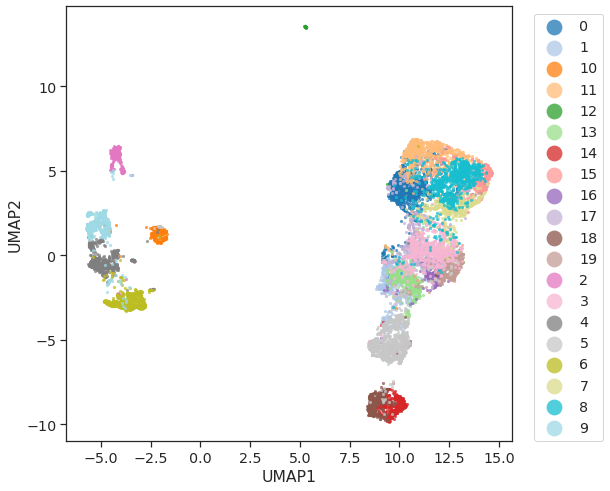

In [9]:
clustering.plot_sample_clusters(sample_id="Corrected_165-09",
                                method="UMAP",
                                include_legend=True,
                                legend_kwargs={"bbox_to_anchor": (1.22, 1.0),
                                               "markerscale": 5})

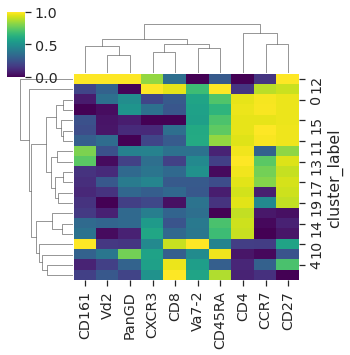

In [10]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             sample_id="Corrected_165-09",
                             figsize=(5, 5),
                             cmap="viridis",
                             standard_scale=1,
                             vmin=0, vmax=1)

<h2>Meta clustering</h2>

In [27]:
clustering.meta_cluster(consensus_metacluster,
                        summary_method="median",
                        cluster_class=AgglomerativeClustering(linkage="ward"),
                        scale_method=None,
                        smallest_cluster_n=10,
                        largest_cluster_n=20,
                        n_resamples=100)

----- Consensus meta-clustering ------


  0%|          | 0/10 [00:00<?, ?it/s]

Clustering performance...
Silhouette coefficient: 0.2902675912897558
Calinski-Harabasz index: 101.59823537850792
Davies-Bouldin index: 1.0479917866699926


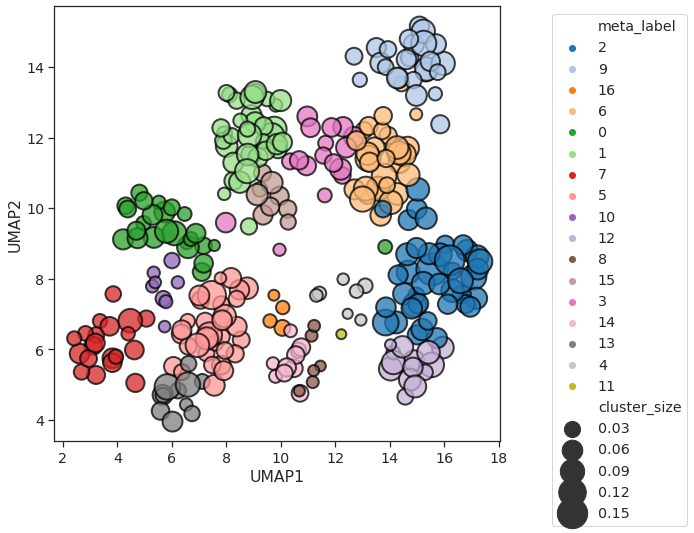

In [28]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1})
plt.savefig("figures/FlowSOM/meta_umap.png", dpi=300, facecolor="white", bbox_inches="tight")

In [29]:
clustering.data["subject"] = clustering.data["sample_id"].apply(lambda x: x.replace("Corrected_", ""))

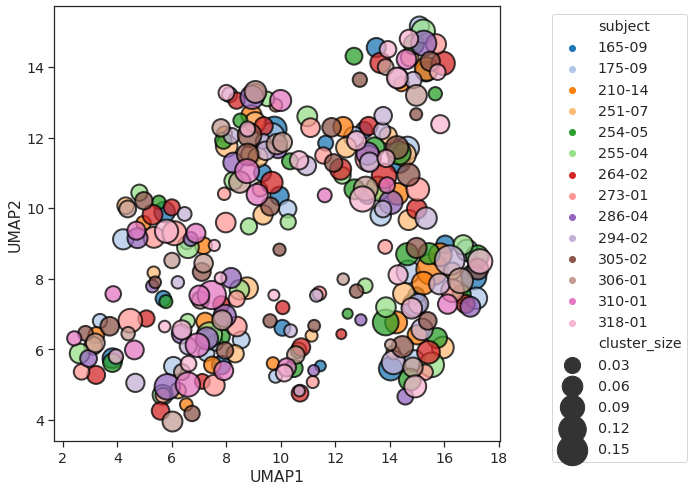

In [30]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1},
                              colour_label="subject")
plt.savefig("figures/FlowSOM/meta_umap_subject.png", dpi=300, facecolor="white", bbox_inches="tight")

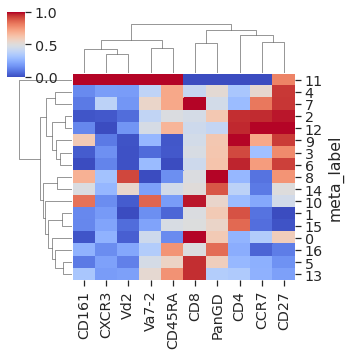

In [31]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(5, 5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [32]:
clustering.data[clustering.data.meta_label == 11]

,original_index,FSC-A,FSC-H,SSC-A,SSC-W,CXCR3,CD161,CCR7,Va7-2,CD8,...,CD45RA,PanGD,CD4,CD27,population_label,sample_id,subject_id,cluster_label,subject,meta_label
69990,479,0.884853,0.851558,0.776390,0.887638,0.494668,0.552892,0.400002,0.468606,0.094149,...,0.778520,-0.255389,0.346022,0.483250,XGB__Unclassified,Corrected_264-02,None,20,264-02,11
69991,1403,0.864492,0.847406,0.739140,0.862380,0.522736,0.668665,0.118603,0.636204,-0.174420,...,0.830474,-0.377819,0.268200,0.492384,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69992,4388,0.874292,0.854647,0.743268,0.859323,0.492934,0.489553,0.353440,0.633107,-0.078051,...,0.793187,-0.338022,0.376835,0.523782,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69993,6336,0.869345,0.850833,0.755971,0.862567,0.483906,0.446010,0.471640,0.579073,0.093475,...,0.764783,-0.161708,0.096562,0.541523,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69994,6351,0.867933,0.847341,0.765926,0.875266,0.577879,0.645755,0.436900,0.682427,-0.223760,...,0.901906,-0.451526,-0.181372,0.506162,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69995,7006,0.868235,0.852279,0.758613,0.861180,0.589608,0.653353,0.135654,0.714614,-0.266467,...,0.894171,-0.432929,-0.072128,0.475155,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69996,7064,0.851960,0.828862,0.770149,0.861266,0.506129,0.595299,0.225922,0.609014,-0.187945,...,0.831236,-0.352359,-0.104893,0.440453,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69997,7533,0.864115,0.838770,0.789875,0.865408,0.589878,0.603302,-0.041931,0.704995,-0.285501,...,0.891936,-0.386455,-0.074835,0.533565,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11
69998,9646,0.886304,0.866389,0.785835,0.863855,0.576043,0.630802,0.154103,0.630764,-0.096020,...,0.875942,-0.437894,-0.184223,0.482618,XGB__MAIT cells,Corrected_264-02,None,20,264-02,11


In [33]:
clustering.data = clustering.data[clustering.data.meta_label != 11].copy()

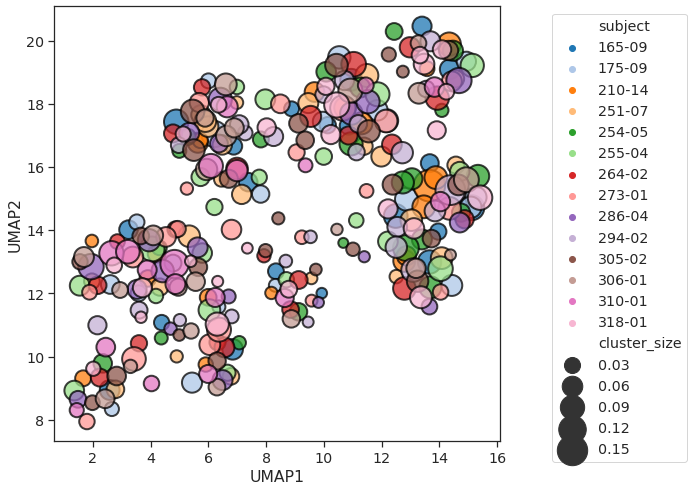

In [34]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1},
                              colour_label="subject")
plt.savefig("figures/FlowSOM/meta_umap_subject.png", dpi=300, facecolor="white", bbox_inches="tight")

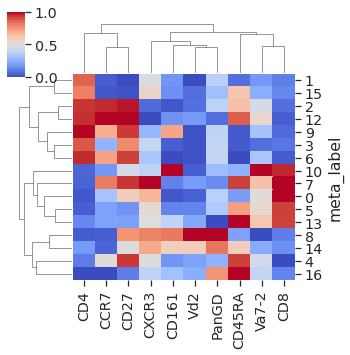

In [35]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(5, 5),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)

In [42]:
clustering.rename_meta_clusters({1: "CD4+ T cells (1)",
                                 14:"CD4+ T cells (2)",
                                 2: "CD4+ T cells (3)",
                                 12:"CD4+ T cells (4)",
                                 9: "CD4+ T cells (5)",
                                 3: "CD4+ T cells (6)",
                                 6: "CD4+ T cells (7)",
                                 15:"CD4+ T cells (8)",
                                 10:"MAIT cells",
                                 7: "CD8+ T cells (1)",
                                 0: "CD8+ T cells (2)",
                                 5: "CD8+ T cells (3)",
                                 13:"CD8+ T cells (4)",
                                 0: "CD8+ T cells (2)",
                                 8: "Vδ2+ γδ T cells",
                                 14:"Vδ2+ γδ T cells",
                                 4: "CD4- CD8- T cells",
                                 16:"CD4- CD8- T cells"})

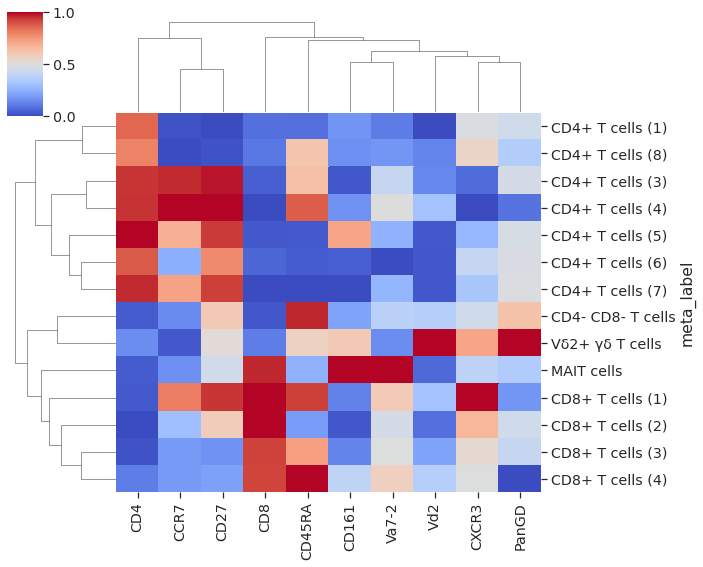

In [43]:
clustering.clustered_heatmap(features=['CXCR3', 'CD161', 'CCR7', 'Va7-2',
                                       'CD8', 'Vd2', 'CD45RA', 'PanGD', 
                                       'CD4', 'CD27'],
                             figsize=(10, 8),
                             cmap="coolwarm",
                             standard_scale=1,
                             yticklabels=True)
plt.savefig("figures/FlowSOM/meta_heatmap.png", dpi=300, facecolor="white", bbox_inches="tight")

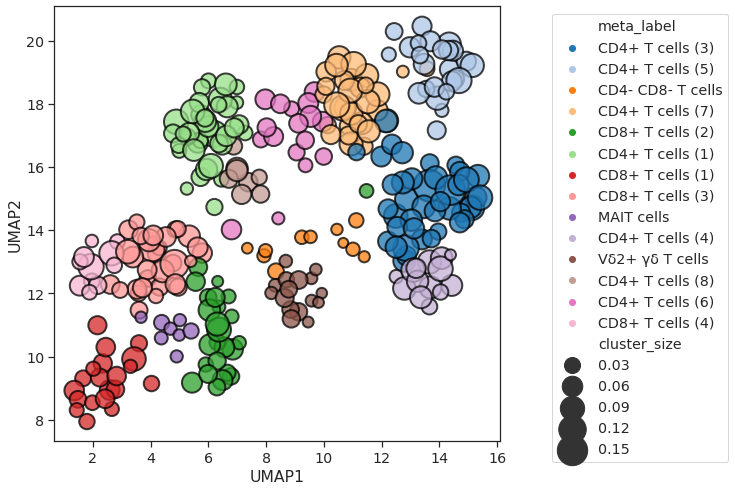

In [44]:
clustering.plot_meta_clusters(dim_reduction_kwargs={"n_neighbors": 50,
                                                    "min_dist": 1})
plt.savefig("figures/FlowSOM/meta_umap.png", dpi=300, facecolor="white", bbox_inches="tight")

In [45]:
clustering.save()

  0%|          | 0/14 [00:00<?, ?it/s]

<h2>Comparison to manual gating</h2>

In [7]:
auto_results = exp.population_statistics()
manual = pd.read_csv("manual_gates1.csv")

In [8]:
def auto_vs_manual(auto_results: pd.DataFrame,
                   manual: pd.DataFrame,
                   auto_population_name: str,
                   manual_population_name: str):
    sample_n = (auto_results[auto_results.population_name.str.contains("FlowSOM")]
                .groupby("sample_id")
                .n.sum())
    sample_n.name = "sample_n"
    auto = auto_results[auto_results.population_name.str.contains(auto_population_name)].copy()
    auto = auto.groupby(["sample_id"]).n.sum()
    auto = sample_n.reset_index().merge(auto.reset_index(), on="sample_id")
    auto["Auto"] = auto["n"]/auto["sample_n"]
    auto["sample_id"] = auto["sample_id"].apply(lambda x: x.replace("Corrected_", ""))
    manual["Manual"] = manual[manual_population_name]/manual["Live single CD3+ cells"]
    stats = manual.merge(auto, on="sample_id", how="outer")
    stats.fillna(0, inplace=True)
    
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.scatter(stats.Auto.values*100,
               stats.Manual.values*100,
               edgecolor="black",
               color="#4e7abf",
               s=120,
               linewidth=2,
               zorder=1)
    ax.plot([0, 1], [0, 1], transform=ax.transAxes, linestyle="--", color="black", zorder=0)
    axis_lower_lim = np.min([np.min(ax.get_xlim()),
                             np.min(ax.get_ylim())])
    axis_upper_lim = np.max([np.max(ax.get_xlim()),
                             np.max(ax.get_ylim())])
    ax.set_xlim((axis_lower_lim, axis_upper_lim))
    ax.set_ylim((axis_lower_lim, axis_upper_lim))
    ax.locator_params(axis='y', nbins=6)
    ax.locator_params(axis='x', nbins=6)
    ax.set_xlabel("Autonomous gates")
    ax.set_ylabel("Manual gates")
    return ax, stats

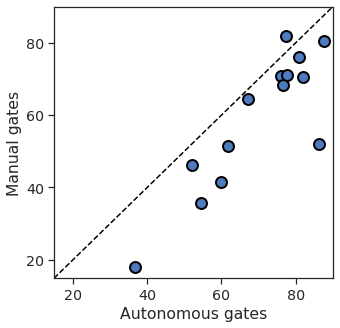

In [9]:
ax, stats = auto_vs_manual(auto_results, manual, "FlowSOM_CD4+", "CD4+ CD8- T cells")
plt.savefig("figures/FlowSOM/cd4.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()

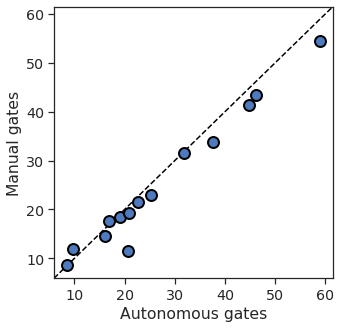

In [10]:
ax, stats = auto_vs_manual(auto_results, manual, "FlowSOM_CD8+", "CD4- CD8+ T cells")
plt.savefig("figures/FlowSOM/cd8.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()

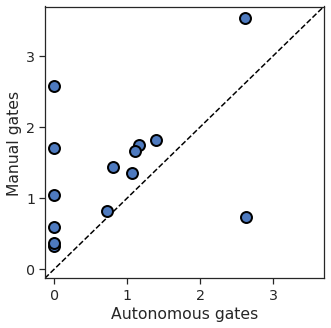

In [11]:
ax, stats = auto_vs_manual(auto_results, manual, "FlowSOM_MAIT", "MAIT cells")
plt.savefig("figures/FlowSOM/MAITs.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()

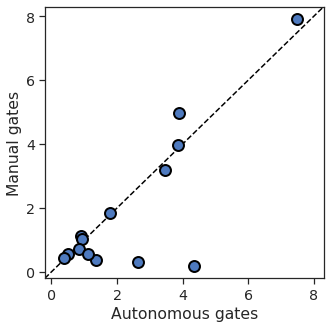

In [12]:
ax, stats = auto_vs_manual(auto_results, manual, "FlowSOM_Vδ2+", "Vd2+ GDTs")
plt.savefig("figures/FlowSOM/GDTs.png", facecolor="white", bbox_inches="tight", dpi=300)
plt.show()